In [1]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
from glob import glob
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam


warnings.filterwarnings("ignore")

In [68]:

# data = pd.read_csv('/content/driver/My Drive/Deep-Learning/stock3/data_stocks.csv')
path_train = '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/train_k59/*.csv'
files = glob(path_train)
x_input =[]
y_output=[]
print(files)
for file in files:
  data = pd.read_csv(file)
  data_at = data['AT'].values
  data_xt = data['XT'].values
  data_ac = data['AC'].values/100
  data_total_ac = data['TOTAL_AC'].values/100
  data_total_at = data['TOTAL_AT'].values

#dung de lay du lieu theo cap
  data_input3D = []
  data_output2D = []
  steps = 3
  
  for i in range(0,len(data_xt)-steps+1):
    temp_3D = []
    temp_output_2D = []
    for k in range(i, i+steps):
      temp_2D = []
      temp_2D.append(data_at[k])
      temp_2D.append(data_xt[k])
      temp_2D.append(data_ac[k])
      
      temp_3D.append(temp_2D)

    temp_output_2D.append(data_total_at[i])
    temp_output_2D.append(data_total_ac[i])

    data_input3D.append(temp_3D)
    data_output2D.append(temp_output_2D)

  x_input.append(data_input3D)
  y_output.append(data_output2D)

x_input = np.concatenate( x_input, axis=0 )
y_output = np.concatenate( y_output, axis=0 )
x_train = np.asarray(x_input)
y_train = np.asarray(y_output)

x_train = x_train.reshape(-1,3,3)
y_train = y_train.reshape(-1,2)


['/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/train_k59/dataA.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/train_k59/dataC.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/train_k59/dataE.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/train_k59/dataF.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/train_k59/dataD.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/train_k59/dataG.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/train_k59/dataB.csv']


In [69]:
n_input = 3
n_features = 3

model = Sequential()
model.add(LSTM(20, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.2))
model.add(Dense(2))
model.summary()
adam = Adam(lr=0.0005) 
model.compile(optimizer=adam, loss='mse')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 20)                1920      
_________________________________________________________________
dropout_6 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 42        
Total params: 1,962
Trainable params: 1,962
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.fit(x_train, y_train, epochs=1200, validation_split=0.2, verbose=1, batch_size=3)
model.save('/content/driver/My Drive/Deep-Learning/LSTM_Software/Code/Use Data_K59/ATXTAC_DOAN_TOTALAT_TOTALAC/3_1_ac.h5')

Train on 72 samples, validate on 19 samples
Epoch 1/1200
72/72 [==============================] - 7s 93ms/step - loss: 139.1846 - val_loss: 248.5366
Epoch 2/1200
72/72 [==============================] - 0s 2ms/step - loss: 121.5573 - val_loss: 223.2313
Epoch 3/1200
72/72 [==============================] - 0s 1ms/step - loss: 98.7436 - val_loss: 172.0474
Epoch 4/1200
72/72 [==============================] - 0s 2ms/step - loss: 70.3882 - val_loss: 102.3453
Epoch 5/1200
72/72 [==============================] - 0s 2ms/step - loss: 57.8224 - val_loss: 72.2141
Epoch 6/1200
72/72 [==============================] - 0s 2ms/step - loss: 50.3914 - val_loss: 62.2084
Epoch 7/1200
72/72 [==============================] - 0s 2ms/step - loss: 46.6186 - val_loss: 56.4987
Epoch 8/1200
72/72 [==============================] - 0s 2ms/step - loss: 44.4427 - val_loss: 53.6137
Epoch 9/1200
72/72 [==============================] - 0s 2ms/step - loss: 43.5140 - val_loss: 51.7310
Epoch 10/1200
72/72 [==========

(1, 16, 3, 3)
(16, 3, 3)
[[17.19464   7.479105]
 [18.460155  8.221928]
 [19.624989  8.780588]
 [20.503395  8.753706]
 [21.142723  9.101704]
 [21.369385  9.398038]
 [21.242283  9.36113 ]
 [20.805279  9.299999]
 [20.50179   9.371173]
 [20.316675  9.580541]
 [20.123123  9.629295]
 [20.073406  9.707652]
 [20.012089  9.785019]
 [20.09079   9.690382]
 [20.255127  9.532032]
 [20.532396  9.932765]]
[[ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]]
[747.9105  822.19275 878.05884 875.3706  910.17035 939.8038  936.113
 929.99994 937.1173  958.0541  962.92957 970.7652  978.5019  969.0382
 953.2032  993.2765 ]
actually:  [[ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.   989.92]
 [ 21.  

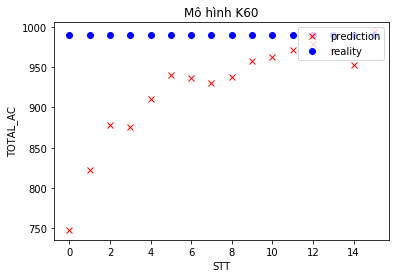

In [77]:
model = keras.models.load_model('/content/driver/My Drive/Deep-Learning/LSTM_Software/Code/Use Data_K59/ATXTAC_DOAN_TOTALAT_TOTALAC/3_1_ac.h5')
path_test = '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/test_k59/dataH.csv'

test = pd.read_csv(path_test)
ip_test_at = test['AT'].values.astype('float64')
ip_test_xt = test['XT'].values.astype('float64') 
ip_test_ac = test['AC'].values.astype('float64')/100
test_output_total_ac = test['TOTAL_AC'].values.astype('float64')
test_output_total_at = test['TOTAL_AT'].values.astype('float64')


x_input=[]
y_output =[]

data_input3D = []
data_output2D = []
steps = 3
for i in range(0,len(ip_test_at)-steps+1):
  temp_3D = []
  temp_output_2D = []
  for k in range(i, i+steps):
    temp_2D = []
    temp_2D.append(ip_test_at[k])
    temp_2D.append(ip_test_xt[k])
    temp_2D.append(ip_test_ac[k])
    
    temp_3D.append(temp_2D)

  temp_output_2D.append(test_output_total_at[i])
  temp_output_2D.append(test_output_total_ac[i])

  data_input3D.append(temp_3D)
  data_output2D.append(temp_output_2D)

x_input.append(data_input3D)
y_output.append(data_output2D)

x_test = np.asarray(x_input)
y_test = np.asarray(y_output)



print(x_test.shape)
x_test = x_test.reshape(-1,3,3)
y_test = y_test.reshape(-1,2)

print(x_test.shape)

result = model.predict(x_test)


print(result)
print(y_test)
# result = result*100
# # result = scaler.inverse_transform(result)

print(result[:,1]*100)
plt.plot(result[:,1]*100,'x', color='r')
plt.plot(y_test[:,1], 'o' ,color='b')
plt.title("Mô hình K60")
plt.xlabel("STT")
plt.ylabel("TOTAL_AC")
# mplcursors.cursor(hover=True)
print("actually: ",y_test)
print("model: ", result)
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()